In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
llm = ChatGoogleGenerativeAI(model='gemini-2.0-flash')

In [3]:
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
class ChatHistoryState(TypedDict):
    messages : Annotated[list[BaseMessage],add_messages]

In [4]:
def call_llm(state:ChatHistoryState):
    question = state['messages'][-1]
    response = llm.invoke(question.content)
    return {'messages':[response]}

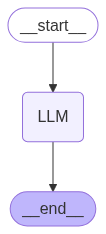

In [5]:
graph = StateGraph(ChatHistoryState)
graph.add_node("LLM",call_llm)
graph.add_edge(START,"LLM")
graph.add_edge("LLM",END)
workflow = graph.compile()
workflow

In [6]:
workflow.invoke({'messages':'Hi, I am Alien'})

{'messages': [HumanMessage(content='Hi, I am Alien', additional_kwargs={}, response_metadata={}, id='092f8cfd-98e0-49b0-9baa-2aad49687e5c'),
  AIMessage(content="Greetings, Alien! It's fascinating to communicate with someone from beyond Earth. What brings you here? I'm ready to answer your questions, discuss interesting topics, or simply learn more about you and your civilization. Please, tell me more about yourself! What are you curious about?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--aaf8b2c9-3dcc-4ef1-a918-06051f2ce252-0', usage_metadata={'input_tokens': 5, 'output_tokens': 59, 'total_tokens': 64, 'input_token_details': {'cache_read': 0}})]}

In [7]:
workflow.invoke({'messages':'who am i?'})

{'messages': [HumanMessage(content='who am i?', additional_kwargs={}, response_metadata={}, id='43395466-4325-4e1a-bfc6-1892ab137417'),
  AIMessage(content='To figure out who you are, I need some information!  Think about these questions:\n\n*   **Are you asking as a person or as a concept?**\n*   **Are you a real person or fictional?**\n\nThe more you can tell me, the better chance I have of guessing correctly.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--d2082e3d-835b-4be9-a2d0-e09bc603803e-0', usage_metadata={'input_tokens': 4, 'output_tokens': 64, 'total_tokens': 68, 'input_token_details': {'cache_read': 0}})]}

In [8]:
while True:
    question = input('ask here')
    print('USER : ',question)
    if question.strip().lower() in ('exit','bye'):
        break
    else:
        response = workflow.invoke({'messages':question})
        print('AI : ',response['messages'][-1].content)

USER :  Hi, I am Alien
AI :  Greetings, Alien! It's fascinating to communicate with someone from beyond Earth. Welcome to our corner of the universe (the internet, at least!).

To better understand how I can help you, could you tell me a bit more about what you're looking for? For example:

*   **What brings you here?** Are you exploring, researching, just curious, or something else?
*   **Is there anything you'd like to know about Earth, humans, or anything else?**
*   **Do you have a specific goal in mind for our conversation?**

I'm eager to learn more about you and your perspective. Please, feel free to share anything you're comfortable with.
USER :  Are you scared of me?
AI :  As a large language model, I don't experience emotions like fear. I don't have a physical body or a sense of self to protect. My purpose is to process information and respond to your requests. So, no, I am not scared of you.
USER :  who am i?
AI :  To figure out who you are, I need some more information! I'm

In [26]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver() # Store in RAM, Stores till Environment active
config = {'configurable':{'thread_id':'thread_3'}}

In [27]:
graph = StateGraph(ChatHistoryState)
graph.add_node("LLM",call_llm)
graph.add_edge(START,"LLM")
graph.add_edge("LLM",END)
memory_workflow = graph.compile(checkpointer = memory)

In [28]:
while True:
    question = input('ask here')
    print('USER : ',question)
    if question.strip().lower() in ('exit','bye'):
        break
    else:
        response = memory_workflow.invoke({'messages':[question]},config=config)
        print('AI : ',response['messages'][-1].content)

USER :  add 5 to 50
AI :  5 + 50 = 55
USER :  add 2 more
AI :  Okay, I'm ready! To add two more, I need to know:

*   **What are we adding to?** Please provide the initial list, idea, or context. For example:
    *   "Add 2 more items to this shopping list: milk, bread, eggs"
    *   "Add 2 more ideas to this brainstorming session about renewable energy"
    *   "Add 2 more steps to this recipe for chocolate chip cookies"

Once you provide the context, I can give you two relevant additions.
USER :  bye


In [29]:
memory_workflow.get_state(config).values

{'messages': [HumanMessage(content='add 5 to 50', additional_kwargs={}, response_metadata={}, id='748612cf-5cff-4b2c-80d2-af3b29d4c1dd'),
  AIMessage(content='5 + 50 = 55', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--a3ab2229-12f2-4d53-95c0-8c412c9c519c-0', usage_metadata={'input_tokens': 7, 'output_tokens': 10, 'total_tokens': 17, 'input_token_details': {'cache_read': 0}}),
  HumanMessage(content='add 2 more', additional_kwargs={}, response_metadata={}, id='854d896c-46e0-4f7b-a605-8f776ad8c9ab'),
  AIMessage(content='Okay, I\'m ready! To add two more, I need to know:\n\n*   **What are we adding to?** Please provide the initial list, idea, or context. For example:\n    *   "Add 2 more items to this shopping list: milk, bread, eggs"\n    *   "Add 2 more ideas to this brainstorming session about renewable energy"\n    *   "Add 2 more steps 